In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df_narr = pd.read_csv('/content/drive/MyDrive/Classes/2 Practicum/[For Classmates 3-Feb-2021] cfpb_cleaned/data_files/STM/stm_labeled_data_v2.0')

In [5]:
df_narr.shape

(657663, 35)

In [6]:
df_narr.head()

,Unnamed: 0,X,Date.received,Product,Sub.product,Issue,Sub.issue,Consumer.complaint.narrative,Company.public.response,Company,State,ZIP.code,Tags,Consumer.consent.provided.,Submitted.via,Date.sent.to.company,Company.response.to.consumer,Timely.response.,Consumer.disputed.,Complaint.ID,Complaint.length,Credit Report Inaccuracies,Unauthorised Accounts and Fraudulent Transactions,"Assets: Vehicles, Real Estate",Identity Theft,Unauthorized Credit Inquiries,"Bank Account Mismanagement: Fees, Charges & Deposits","Loan Mismanagement: Misinformation, Foul-Play","Communications: Robo-Calls, Nuisance, Company Unresponsiveness",Legal Action,Credit Card Promotions/Offers,"Harassment, Customer Service",Disputing Information/Verification,Debt: Disputing Validity,Disputing Late Payments
0,1,0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld system inc try collect debt mine ow...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392,18,0.047128,0.041757,0.017485,0.013969,0.004153,0.003736,0.008741,0.034037,0.022959,0.004236,0.055982,0.047329,0.681091,0.017397
1,2,1,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,past week receive excessive amount telephone c...,NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198,78,0.012458,0.019859,0.006091,0.005754,0.003020,0.003266,0.003513,0.297163,0.006213,0.006871,0.372630,0.013641,0.202014,0.047508
2,3,2,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,pioneer commit several federal violation priva...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555,152,0.015170,0.007107,0.020329,0.010550,0.039737,0.001259,0.001388,0.003730,0.667993,0.024531,0.015921,0.022865,0.163697,0.005721
3,4,3,2019-07-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,previously request experian send copy verifiab...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,914XX,NaN,Consent provided,Web,2019-07-26,Closed with explanation,Yes,NaN,3319331,171,0.122738,0.078570,0.003249,0.009802,0.005270,0.001067,0.002588,0.014340,0.019251,0.002138,0.010869,0.705005,0.010095,0.015019
4,5,4,2019-07-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,hello complaint three credit report company tr...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,109XX,NaN,Consent provided,Web,2019-07-08,Closed with explanation,Yes,NaN,3299394,428,0.149381,0.142992,0.012159,0.078844,0.013872,0.007452,0.004001,0.046901,0.021641,0.006939,0.142531,0.342156,0.018507,0.012625


In [7]:
df_narr.columns

Index(['Unnamed: 0', 'X', 'Date.received', 'Product', 'Sub.product', 'Issue',
       'Sub.issue', 'Consumer.complaint.narrative', 'Company.public.response',
       'Company', 'State', 'ZIP.code', 'Tags', 'Consumer.consent.provided.',
       'Submitted.via', 'Date.sent.to.company', 'Company.response.to.consumer',
       'Timely.response.', 'Consumer.disputed.', 'Complaint.ID',
       'Complaint.length', 'Credit Report Inaccuracies',
       'Unauthorised Accounts and Fraudulent Transactions',
       'Assets: Vehicles, Real Estate', 'Identity Theft',
       'Unauthorized Credit Inquiries',
       'Bank Account Mismanagement: Fees, Charges & Deposits',
       'Loan Mismanagement: Misinformation, Foul-Play',
       'Communications: Robo-Calls, Nuisance, Company Unresponsiveness',
       'Legal Action', 'Credit Card Promotions/Offers',
       'Harassment, Customer Service', 'Disputing Information/Verification',
       'Debt: Disputing Validity', 'Disputing Late Payments'],
      dtype='objec

In [8]:
df_narr.columns[::-1][0:14]

# 14 topics

Index(['Disputing Late Payments', 'Debt: Disputing Validity',
       'Disputing Information/Verification', 'Harassment, Customer Service',
       'Credit Card Promotions/Offers', 'Legal Action',
       'Communications: Robo-Calls, Nuisance, Company Unresponsiveness',
       'Loan Mismanagement: Misinformation, Foul-Play',
       'Bank Account Mismanagement: Fees, Charges & Deposits',
       'Unauthorized Credit Inquiries', 'Identity Theft',
       'Assets: Vehicles, Real Estate',
       'Unauthorised Accounts and Fraudulent Transactions',
       'Credit Report Inaccuracies'],
      dtype='object')

In [9]:
df_probs = df_narr.iloc[:, ::-1].iloc[:, 0:14]

df_probs.head()

,Disputing Late Payments,Debt: Disputing Validity,Disputing Information/Verification,"Harassment, Customer Service",Credit Card Promotions/Offers,Legal Action,"Communications: Robo-Calls, Nuisance, Company Unresponsiveness","Loan Mismanagement: Misinformation, Foul-Play","Bank Account Mismanagement: Fees, Charges & Deposits",Unauthorized Credit Inquiries,Identity Theft,"Assets: Vehicles, Real Estate",Unauthorised Accounts and Fraudulent Transactions,Credit Report Inaccuracies
0,0.017397,0.681091,0.047329,0.055982,0.004236,0.022959,0.034037,0.008741,0.003736,0.004153,0.013969,0.017485,0.041757,0.047128
1,0.047508,0.202014,0.013641,0.372630,0.006871,0.006213,0.297163,0.003513,0.003266,0.003020,0.005754,0.006091,0.019859,0.012458
2,0.005721,0.163697,0.022865,0.015921,0.024531,0.667993,0.003730,0.001388,0.001259,0.039737,0.010550,0.020329,0.007107,0.015170
3,0.015019,0.010095,0.705005,0.010869,0.002138,0.019251,0.014340,0.002588,0.001067,0.005270,0.009802,0.003249,0.078570,0.122738
4,0.012625,0.018507,0.342156,0.142531,0.006939,0.021641,0.046901,0.004001,0.007452,0.013872,0.078844,0.012159,0.142992,0.149381


In [10]:
top_topic = df_probs.idxmax(axis=1)
top_prob = df_probs.max(axis=1)
date_rec = df_narr['Date.received']

date_rec

0         2019-09-24
1         2019-11-08
2         2019-09-15
3         2019-07-26
4         2019-07-08
             ...    
657658    2016-07-11
657659    2017-01-24
657660    2015-03-26
657661    2015-12-12
657662    2016-08-09
Name: Date.received, Length: 657663, dtype: object

In [11]:
df_topic = pd.concat([top_topic, top_prob, date_rec], axis = 1)

df_topic.columns =['Topic', 'max_prob', 'date_rec'] 

df_topic['date_rec'] = pd.to_datetime(df_topic['date_rec'])

df_topic['year'] = pd.DatetimeIndex(df_topic['date_rec']).year
df_topic['month'] = pd.DatetimeIndex(df_topic['date_rec']).month

df_topic 

,Topic,max_prob,date_rec,year,month
0,Debt: Disputing Validity,0.681091,2019-09-24,2019,9
1,"Harassment, Customer Service",0.372630,2019-11-08,2019,11
2,Legal Action,0.667993,2019-09-15,2019,9
3,Disputing Information/Verification,0.705005,2019-07-26,2019,7
4,Disputing Information/Verification,0.342156,2019-07-08,2019,7
...,...,...,...,...,...
657658,Disputing Late Payments,0.417160,2016-07-11,2016,7
657659,"Communications: Robo-Calls, Nuisance, Company ...",0.475167,2017-01-24,2017,1
657660,"Communications: Robo-Calls, Nuisance, Company ...",0.362528,2015-03-26,2015,3
657661,"Loan Mismanagement: Misinformation, Foul-Play",0.362917,2015-12-12,2015,12


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_topic['Topic_Num'] = le.fit_transform(df_topic['Topic'])

In [13]:
list(le.classes_)

['Assets: Vehicles, Real Estate',
 'Bank Account Mismanagement: Fees, Charges & Deposits',
 'Communications: Robo-Calls, Nuisance, Company Unresponsiveness',
 'Credit Card Promotions/Offers',
 'Credit Report Inaccuracies',
 'Debt: Disputing Validity',
 'Disputing Information/Verification',
 'Disputing Late Payments',
 'Harassment, Customer Service',
 'Identity Theft',
 'Legal Action',
 'Loan Mismanagement: Misinformation, Foul-Play',
 'Unauthorised Accounts and Fraudulent Transactions',
 'Unauthorized Credit Inquiries']

In [14]:
df_topic.head()

,Topic,max_prob,date_rec,year,month,Topic_Num
0,Debt: Disputing Validity,0.681091,2019-09-24,2019,9,5
1,"Harassment, Customer Service",0.372630,2019-11-08,2019,11,8
2,Legal Action,0.667993,2019-09-15,2019,9,10
3,Disputing Information/Verification,0.705005,2019-07-26,2019,7,6
4,Disputing Information/Verification,0.342156,2019-07-08,2019,7,6


In [33]:
df_topic['Topic'].value_counts()

Harassment, Customer Service                                      94178
Disputing Information/Verification                                74401
Communications: Robo-Calls, Nuisance, Company Unresponsiveness    69502
Debt: Disputing Validity                                          59636
Loan Mismanagement: Misinformation, Foul-Play                     56213
Disputing Late Payments                                           54866
Credit Report Inaccuracies                                        40577
Credit Card Promotions/Offers                                     39327
Unauthorised Accounts and Fraudulent Transactions                 38839
Bank Account Mismanagement: Fees, Charges & Deposits              35854
Unauthorized Credit Inquiries                                     31102
Identity Theft                                                    29362
Assets: Vehicles, Real Estate                                     21075
Legal Action                                                    

# COVID - Regression Discontinuity Design (RDD) for Topics

### Preprocessing:

Reference: https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html 

In [15]:
df_topic['month_year'] = df_topic['date_rec'].dt.to_period('M')

In [16]:
df_topic.head()

,Topic,max_prob,date_rec,year,month,Topic_Num,month_year
0,Debt: Disputing Validity,0.681091,2019-09-24,2019,9,5,2019-09
1,"Harassment, Customer Service",0.372630,2019-11-08,2019,11,8,2019-11
2,Legal Action,0.667993,2019-09-15,2019,9,10,2019-09
3,Disputing Information/Verification,0.705005,2019-07-26,2019,7,6,2019-07
4,Disputing Information/Verification,0.342156,2019-07-08,2019,7,6,2019-07


In [17]:
df_topic['month_year'].max()

Period('2021-01', 'M')

In [18]:
df_covid = df_topic[(df_topic['month_year'] > '2019-01') & (df_topic['month_year'] < '2021-01')]

df_covid

,Topic,max_prob,date_rec,year,month,Topic_Num,month_year
0,Debt: Disputing Validity,0.681091,2019-09-24,2019,9,5,2019-09
1,"Harassment, Customer Service",0.372630,2019-11-08,2019,11,8,2019-11
2,Legal Action,0.667993,2019-09-15,2019,9,10,2019-09
3,Disputing Information/Verification,0.705005,2019-07-26,2019,7,6,2019-07
4,Disputing Information/Verification,0.342156,2019-07-08,2019,7,6,2019-07
...,...,...,...,...,...,...,...
657485,Credit Report Inaccuracies,0.213299,2019-02-19,2019,2,4,2019-02
657486,"Harassment, Customer Service",0.269189,2019-02-08,2019,2,8,2019-02
657487,"Harassment, Customer Service",0.481373,2019-02-20,2019,2,8,2019-02
657491,"Harassment, Customer Service",0.240462,2019-03-05,2019,3,8,2019-03


In [19]:
list(le.classes_)

['Assets: Vehicles, Real Estate',
 'Bank Account Mismanagement: Fees, Charges & Deposits',
 'Communications: Robo-Calls, Nuisance, Company Unresponsiveness',
 'Credit Card Promotions/Offers',
 'Credit Report Inaccuracies',
 'Debt: Disputing Validity',
 'Disputing Information/Verification',
 'Disputing Late Payments',
 'Harassment, Customer Service',
 'Identity Theft',
 'Legal Action',
 'Loan Mismanagement: Misinformation, Foul-Play',
 'Unauthorised Accounts and Fraudulent Transactions',
 'Unauthorized Credit Inquiries']

### What is RDD:

**Output from STM**: 
- We get 14 Probabilities per Complaint, persuant to each Topic.
- We assign each Complaint to a Topic given their highest probability out of the 14, `max_prob`. 

This is not an even distribution: 

```
Harassment, Customer Service                                      94178
Disputing Information/Verification                                74401
Communications: Robo-Calls, Nuisance, Company Unresponsiveness    69502
Debt: Disputing Validity                                          59636
Loan Mismanagement: Misinformation, Foul-Play                     56213
Disputing Late Payments                                           54866
Credit Report Inaccuracies                                        40577
Credit Card Promotions/Offers                                     39327
Unauthorised Accounts and Fraudulent Transactions                 38839
Bank Account Mismanagement: Fees, Charges & Deposits              35854
Unauthorized Credit Inquiries                                     31102
Identity Theft                                                    29362
Assets: Vehicles, Real Estate                                     21075
Legal Action                                                      12731
Name: Topic, dtype: int64

```
- We also use the numerical value of `max_prob` as an indication of topic importance, since it means that **more words in the associated complaints are related to the given complaint**. We call this **Topic Weight**. 

**Dependent Variable**: 
- Moving Average (Window: 1 Month) of Topic Weight (i.e., highest probability of being clustered into a given topic from each document, derived from STM Modelling)

**Talking points (for discussion)**: 
- March-2020 is an arbitrary cut for COVID effects. Theoretically can have many different cut points -- such is the case for RDD designs. 

- Imbalanced sample before and after threshold. Can subset even further (does this have any effects?)

https://www.nytimes.com/article/coronavirus-timeline.html

March 15: The Centers for Disease Control and Prevention advised no gatherings of 50 or more people in the United States over the next eight weeks. The recommendation included weddings, festivals, parades, concerts, sporting events and conferences. The following day, Mr. Trump advised citizens to avoid groups of more than 10. New York City’s public schools system, the nation’s largest with 1.1 million students, announced that it would close.

March 26: The United States officially became the country hardest hit by the pandemic, with at least 81,321 confirmed infections and more than 1,000 deaths. This was more reported cases than in China, Italy or any other country at the time.

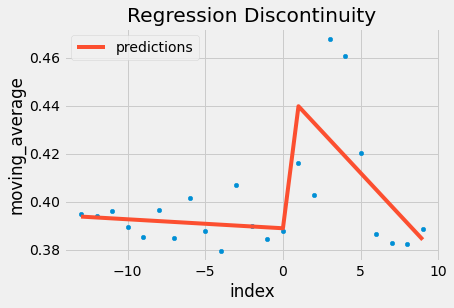

In [31]:
plt.style.use("fivethirtyeight")

ax = rdd_df1.plot.scatter(x="index", y="moving_average", color="C0")
rdd_df1.assign(predictions=model.fittedvalues).plot(x="index", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

### Visualization

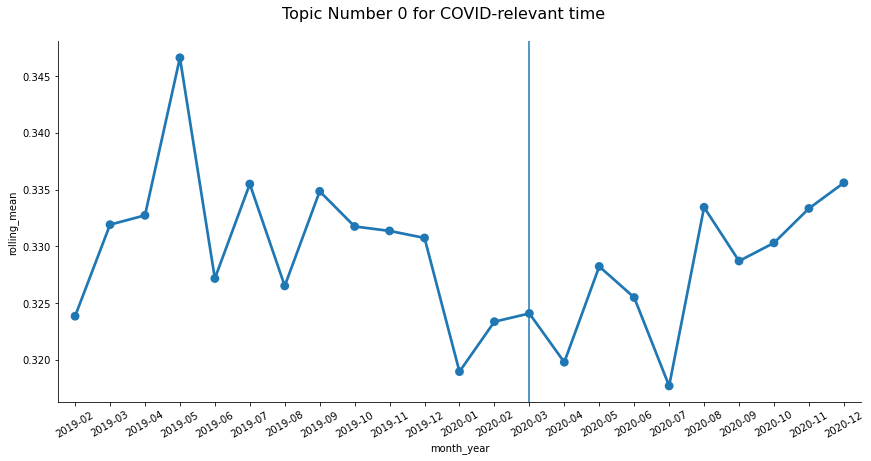

<Figure size 3600x216 with 0 Axes>

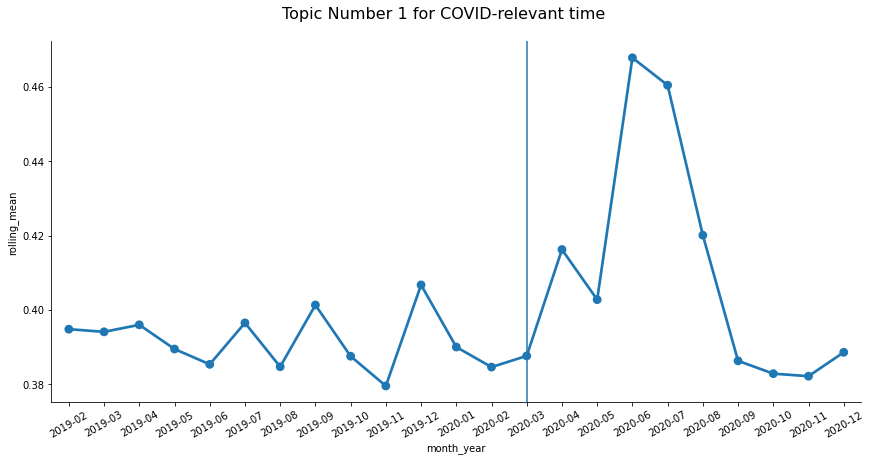

<Figure size 3600x216 with 0 Axes>

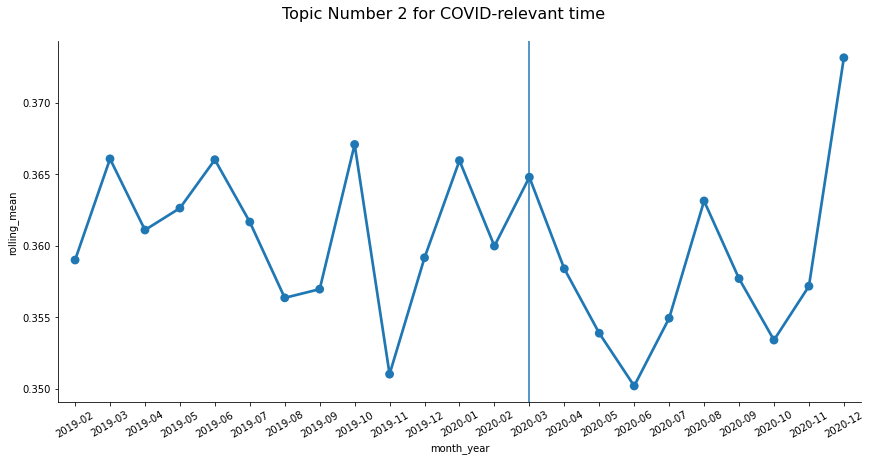

<Figure size 3600x216 with 0 Axes>

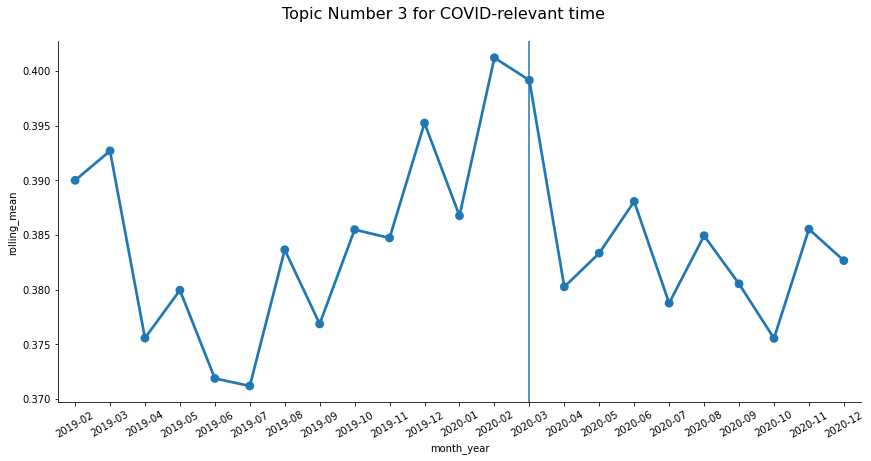

<Figure size 3600x216 with 0 Axes>

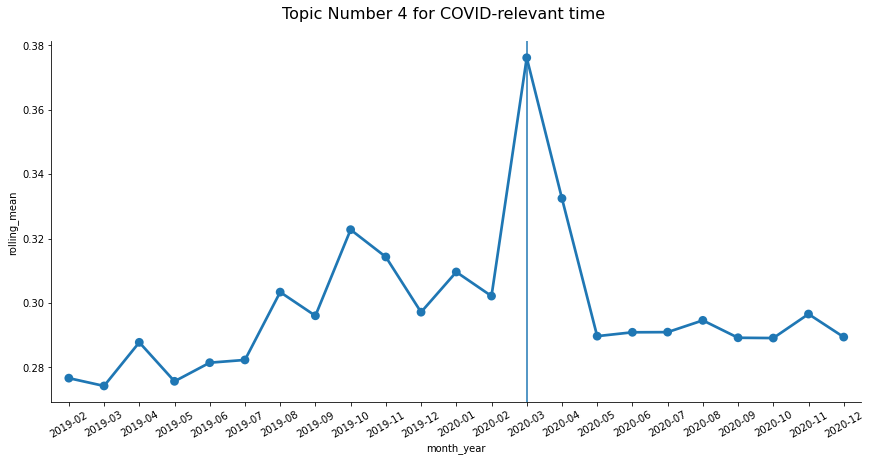

<Figure size 3600x216 with 0 Axes>

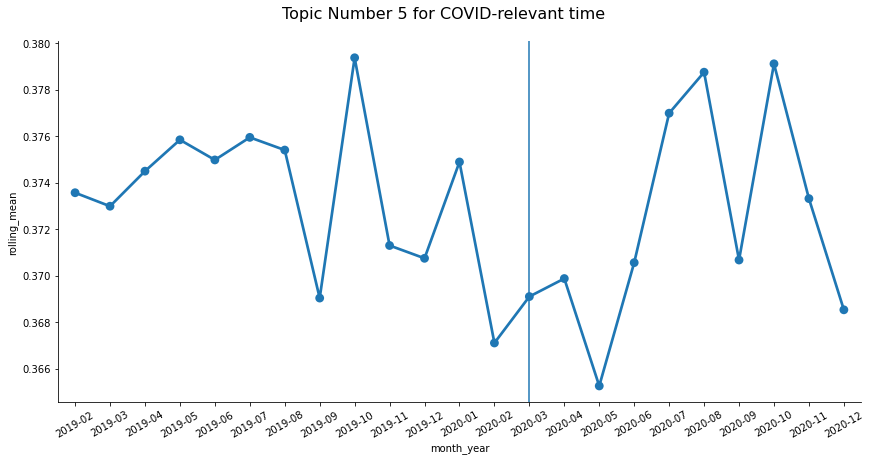

<Figure size 3600x216 with 0 Axes>

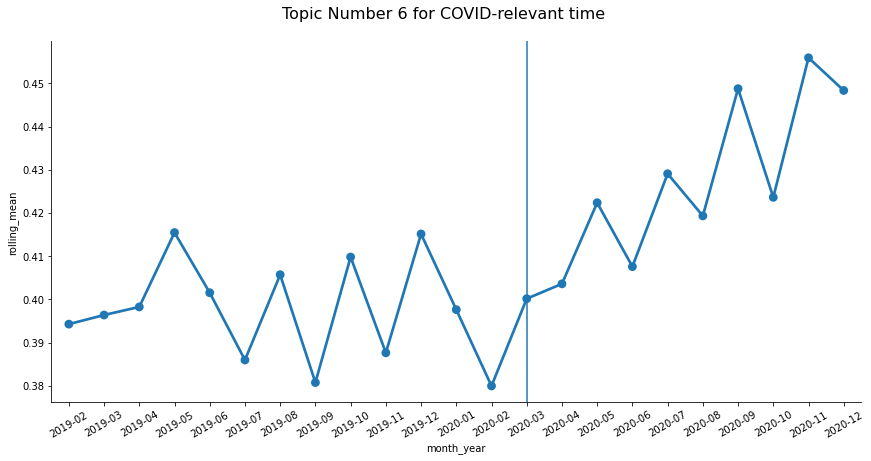

<Figure size 3600x216 with 0 Axes>

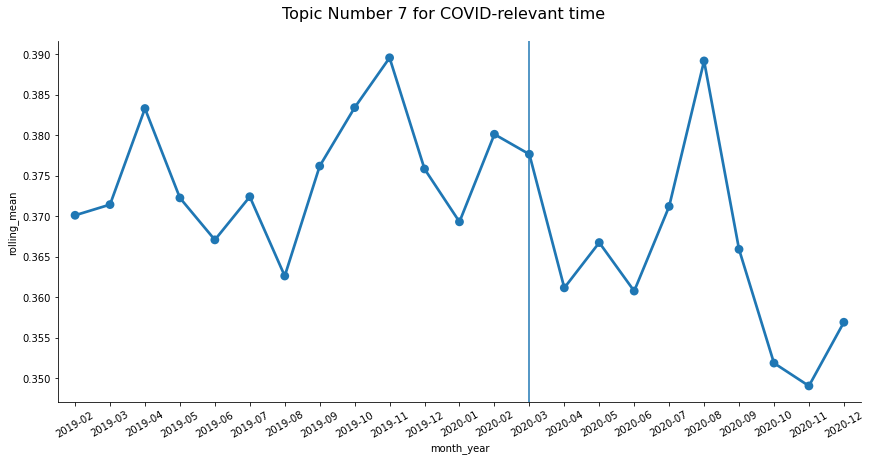

<Figure size 3600x216 with 0 Axes>

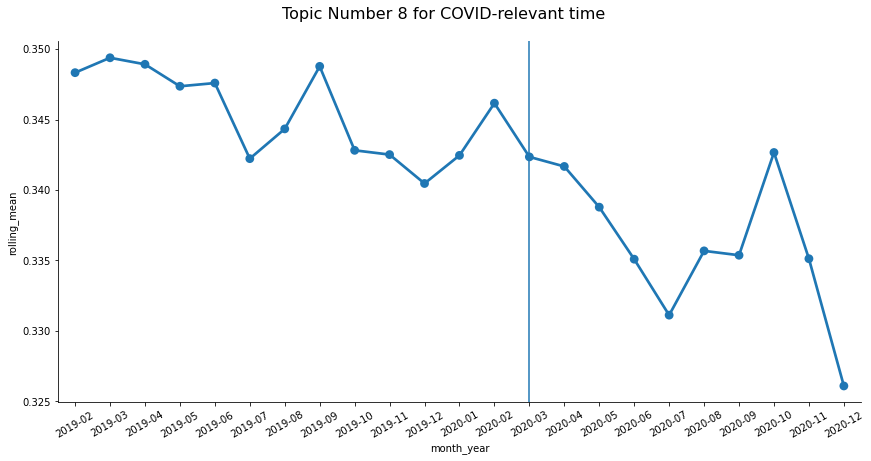

<Figure size 3600x216 with 0 Axes>

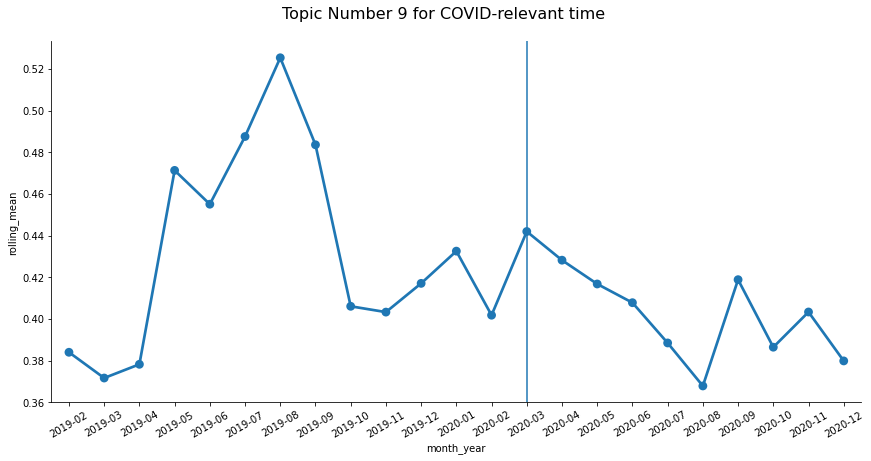

<Figure size 3600x216 with 0 Axes>

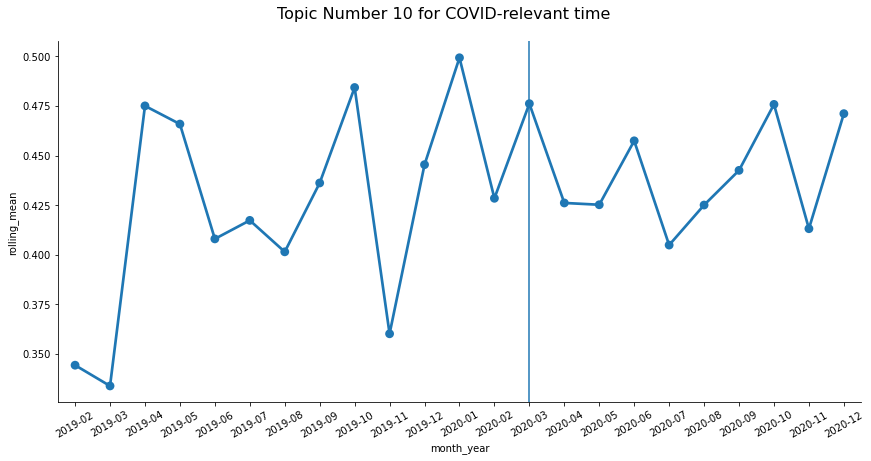

<Figure size 3600x216 with 0 Axes>

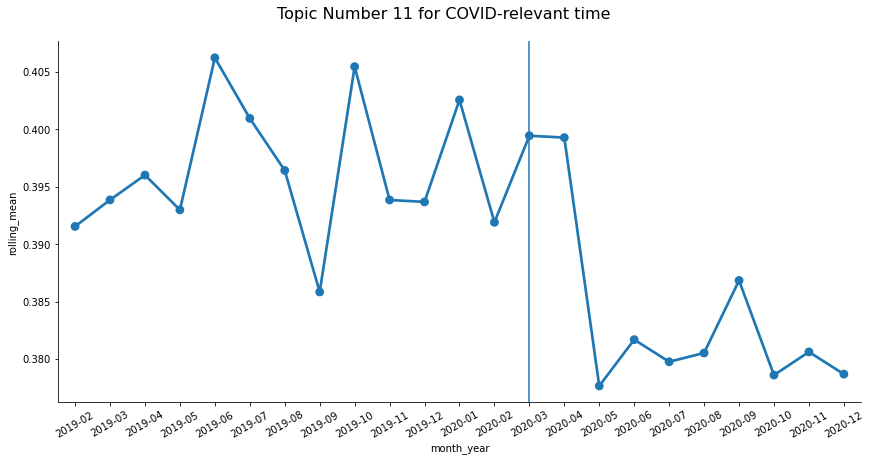

<Figure size 3600x216 with 0 Axes>

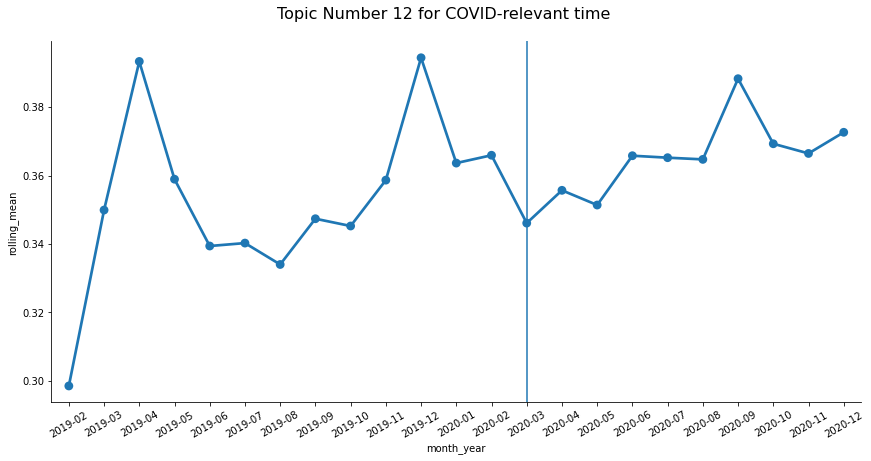

<Figure size 3600x216 with 0 Axes>

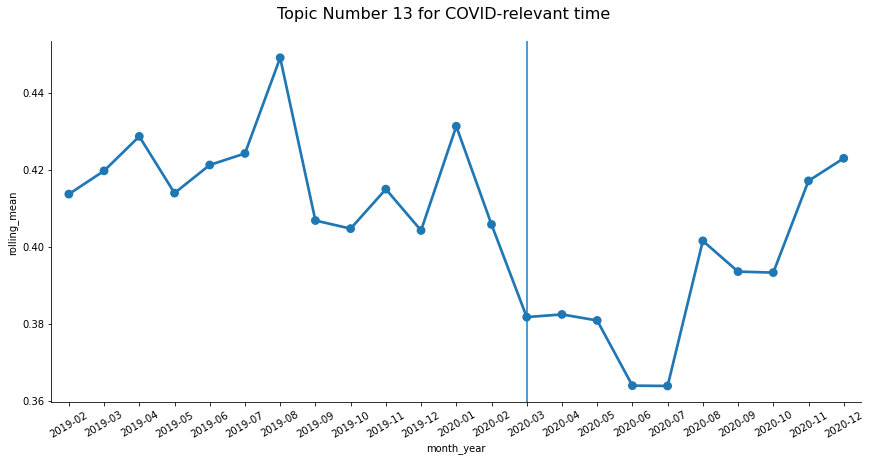

<Figure size 3600x216 with 0 Axes>

In [20]:
def covid_rolling_mean_topic_weight(Topic_Num):
  def create_plotpoint(df, y_value, hue=None, col=None, wrap=None, size=6, aspect=2, title=f'Topic Number {Topic_Num} for COVID-relevant time'):
        p = sns.factorplot(x="month_year", y=y_value, kind='point', 
                        hue=hue, 
                       col=col, col_wrap=wrap, 
                       size=size, aspect=aspect, data=df)
        plt.axvline(13)
        plt.figure(figsize=(50, 3))
        p.set_xticklabels(rotation=30)
        p.fig.subplots_adjust(top=0.9)
        p.fig.suptitle(title, fontsize=16)
        return p
        
  t = df_covid.query(f'Topic_Num == {Topic_Num}')
  tgrouped = t.groupby('month_year')['max_prob'].mean()
  t_rolling = tgrouped.rolling(1).mean().reset_index()
  t_rolling.columns = ['month_year', 'rolling_mean']
  create_plotpoint(t_rolling, 'rolling_mean')


for x in range(0,14):
  covid_rolling_mean_topic_weight(x)

### Formal Analysis for RDD: 

In [21]:
list(le.classes_)[1]

'Bank Account Mismanagement: Fees, Charges & Deposits'

In [22]:
df_for1  = df_covid[df_covid['Topic_Num'] == 1].groupby('month_year')['max_prob'].mean().rolling(1).mean().reset_index()

df_for1.columns = ['month_year', 'moving_average']

In [24]:
rdd_df1 = df_for1.assign(threshold=(df_for1["month_year"] > '2020-03').astype(int))

In [26]:
rdd_df1['index'] = rdd_df1.index

In [27]:
rdd_df1['index'] -= 13

In [28]:
rdd_df1

,month_year,moving_average,threshold,index
0,2019-02,0.394810,0,-13
1,2019-03,0.394097,0,-12
2,2019-04,0.395988,0,-11
3,2019-05,0.389471,0,-10
4,2019-06,0.385347,0,-9
5,2019-07,0.396511,0,-8
6,2019-08,0.384703,0,-7
7,2019-09,0.401323,0,-6
8,2019-10,0.387530,0,-5
9,2019-11,0.379528,0,-4


In [29]:
import statsmodels.formula.api as smf

model = smf.ols("moving_average~index*threshold", rdd_df1).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3889,0.009,41.881,0.000,0.369,0.408
index,-0.0004,0.001,-0.308,0.761,-0.003,0.002
threshold,0.0578,0.016,3.563,0.002,0.024,0.092
index:threshold,-0.0066,0.003,-2.473,0.023,-0.012,-0.001


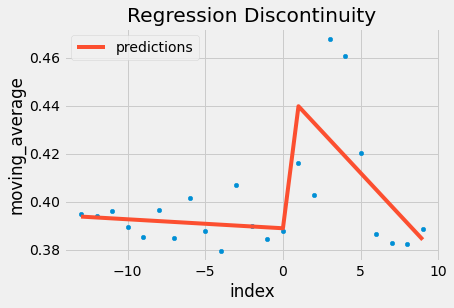

In [30]:
plt.style.use("fivethirtyeight")

ax = rdd_df1.plot.scatter(x="index", y="moving_average", color="C0")
rdd_df1.assign(predictions=model.fittedvalues).plot(x="index", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

In [34]:
model.params["threshold"] #Average Treatment Effect

0.05779692052886068

In [35]:
model.params["Intercept"]

0.38887334469210544

**Why this formula?** 

Let's go back to OLS Interpretations; because in effect, we are comparing two OLS regressions, one before COVID hit (i.e., `threshold` = 0) and one after COVID hit (i.e., `threshold` = 1) . 

Easy Interpretation of Average Treatment Effect -- Interpretation of `Threshold` Dummy Variable: Net of `index`, on average, after COVID hit, topic is of 0.0578 topic weight units higher.

Intercept Interpretation: At the threshold in this time-series (`Index` = 0), just at the point when COVID hit (i.e., i.e., `threshold` = 0), the moving average value for Topic Weight.

We can also calculate the Average Treatment Effect as a **percentage change from the value before the treatment**: 

In [36]:
(model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"]

1.1486265935111135

In [37]:
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
print("Impact of COVID on Topic Weight: " + str(np.round(ate_pct, 3)) + "%")

Impact of COVID on Topic Weight: 14.863%


In [38]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model, alpha=0.05)

predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T

In [39]:
predict_mean_ci_low

array([0.37430339, 0.37603674, 0.3776383 , 0.37905034, 0.38018832,
       0.38093787, 0.38117134, 0.38079717, 0.37981535, 0.37831746,
       0.37643113, 0.37427074, 0.37192084, 0.36943914, 0.4161673 ,
       0.41319233, 0.40966959, 0.40518198, 0.39915946, 0.39128762,
       0.38188088, 0.37150926, 0.36058988])

In [40]:
predict_mean_ci_upp

array([0.41317179, 0.4106901 , 0.4083402 , 0.40617981, 0.40429348,
       0.40279558, 0.40181377, 0.4014396 , 0.40167306, 0.40242262,
       0.4035606 , 0.40497264, 0.40657419, 0.40830755, 0.46327888,
       0.45235949, 0.44198787, 0.43258113, 0.4247093 , 0.41868678,
       0.41419916, 0.41067643, 0.40770146])

In [41]:
def rdd_for_topics(Topic_Num):
  import statsmodels.formula.api as smf
  df = df_covid[df_covid['Topic_Num'] == Topic_Num].groupby('month_year')['max_prob'].mean().rolling(1).mean().reset_index()
  df.columns = ['month_year', 'moving_average']
  rdd_df = df.assign(threshold=(df["month_year"] > '2020-03').astype(int))
  rdd_df['index'] = rdd_df.index
  rdd_df['index'] -= 13
  m = smf.ols("moving_average~index*threshold", rdd_df).fit()
  return m.summary().tables[1] 

In [48]:
for x in range (0, 14):
  print(f'Topic Number {x}')
  print(rdd_for_topics(x))

Topic Number 0
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3256      0.003    110.645      0.000       0.319       0.332
index              -0.0007      0.000     -1.760      0.094      -0.001       0.000
threshold          -0.0058      0.005     -1.121      0.276      -0.017       0.005
index:threshold     0.0023      0.001      2.769      0.012       0.001       0.004
Topic Number 1
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3889      0.009     41.881      0.000       0.369       0.408
index              -0.0004      0.001     -0.308      0.761      -0.003       0.002
threshold           0.0578      0.016      3.563      0.002       0.024       0.092
index:threshold    -0.0066      0.003     -2.4

Looks like Topics 1, 4, 6, 13 are worth exploring for COVID effects on Topic Weight.



That's: 

In [52]:
for x in [1, 2, 4, 13]:
  print(list(le.classes_)[x])

Bank Account Mismanagement: Fees, Charges & Deposits
Communications: Robo-Calls, Nuisance, Company Unresponsiveness
Credit Report Inaccuracies
Unauthorized Credit Inquiries


In [53]:
def get_threshold_coeffs_rdd_for_topics(Topic_Num):
  import statsmodels.formula.api as smf
  df = df_covid[df_covid['Topic_Num'] == Topic_Num].groupby('month_year')['max_prob'].mean().rolling(1).mean().reset_index()
  df.columns = ['month_year', 'moving_average']
  rdd_df = df.assign(threshold=(df["month_year"] > '2020-03').astype(int))
  rdd_df['index'] = rdd_df.index
  rdd_df['index'] -= 13
  m = smf.ols("moving_average~index*threshold", rdd_df).fit()
  return m.params["threshold"]

In [54]:
for x in [1, 2, 4, 13]:
  print(get_threshold_coeffs_rdd_for_topics(x))

0.05779692052886068
-0.009337061718053763
-0.022793785153494783
-0.04392473045814943


Increase in Topic Weight for Bank Account Mismanagement after COVID: 
- Bank Account Mismanagement: Fees, Charges & Deposits

Decrease in Topic Weight for after COVID:
- Communications: Robo-Calls, Nuisance, Company Unresponsiveness
- Credit Report Inaccuracies
- Unauthorized Credit Inquiries

### Triangular Kernel Approach (Weighted Linear Regression) -- Should we pursue?

In [55]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

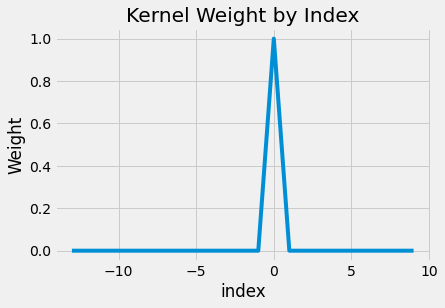

In [57]:
plt.plot(rdd_df1["index"], kernel(rdd_df1["index"], c=0, h=1))
plt.xlabel("index")
plt.ylabel("Weight")
plt.title("Kernel Weight by Index");